<a href="https://colab.research.google.com/github/vyshnxviii/Stock-Price-Prediction/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
company_symbols = ['TATASTEEL.NS', 'RELIANCE.NS', 'BHARTIARTL.NS']
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

In [ ]:
company_data = {}

for symbol in company_symbols:
    df = yf.download(symbol, start=start_date, end=end_date)
    company_data[symbol] = df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-18,765.000000,765.000000,752.549988,759.750000,756.276062,4051481
2023-04-19,761.349976,766.849976,756.000000,764.650024,761.153687,3429794
2023-04-20,764.000000,773.750000,762.599976,772.299988,768.768677,2355441
2023-04-21,769.599976,775.250000,764.450012,765.200012,761.701172,4524208
2023-04-24,765.200012,767.400024,755.650024,760.250000,756.773804,5271105
...,...,...,...,...,...,...
2024-04-09,1214.949951,1214.949951,1198.300049,1204.449951,1204.449951,3372798
2024-04-10,1213.250000,1230.699951,1208.750000,1229.400024,1229.400024,6442196
2024-04-12,1226.099976,1231.849976,1219.550049,1225.550049,1225.550049,7877073


In [ ]:
from sklearn.preprocessing import StandardScaler



In [ ]:
company_models={}
for symbol, df in company_data.items():
    df = df.copy()  # Create a copy to avoid modifying the original DataFrame
    df['Target'] = df['Close'].shift(-1)
    df.dropna(inplace=True)
    X = df[['Close']]
    y = df['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    company_models[symbol] = model


In [ ]:
import csv

# Define the file name
csv_file = 'prediction_results_lr.csv'

# Predictions and Evaluation
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Company', 'MAE', 'MSE', 'RMSE', 'Predicted Price'])

    for symbol, df in company_data.items():
        model = company_models[symbol]
        X_test = df[['Close']].tail(1)  # Use the last closing price for testing
        y_test = df['Close'].tail(1)  # True value for the last day
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        # Write results to CSV
        writer.writerow([symbol, mae, mse, rmse, y_pred[0]])

        # Print the results
        print(f"Company: {symbol}")
        print(f"MAE: {mae:.2f}")
        print(f"MSE: {mse:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"Predicted Price: {y_pred[0]}")
        print("\n")

# Notify user
print(f"Results saved to {csv_file}")


Company: TATASTEEL.NS
MAE: 0.12
MSE: 0.01
RMSE: 0.12
Predicted Price: 160.17207797939614


Company: RELIANCE.NS
MAE: 1.59
MSE: 2.52
RMSE: 1.59
Predicted Price: 2933.0876213607644


Company: BHARTIARTL.NS
MAE: 0.96
MSE: 0.93
RMSE: 0.96
Predicted Price: 1217.4144125793277


Results saved to prediction_results_lr.csv


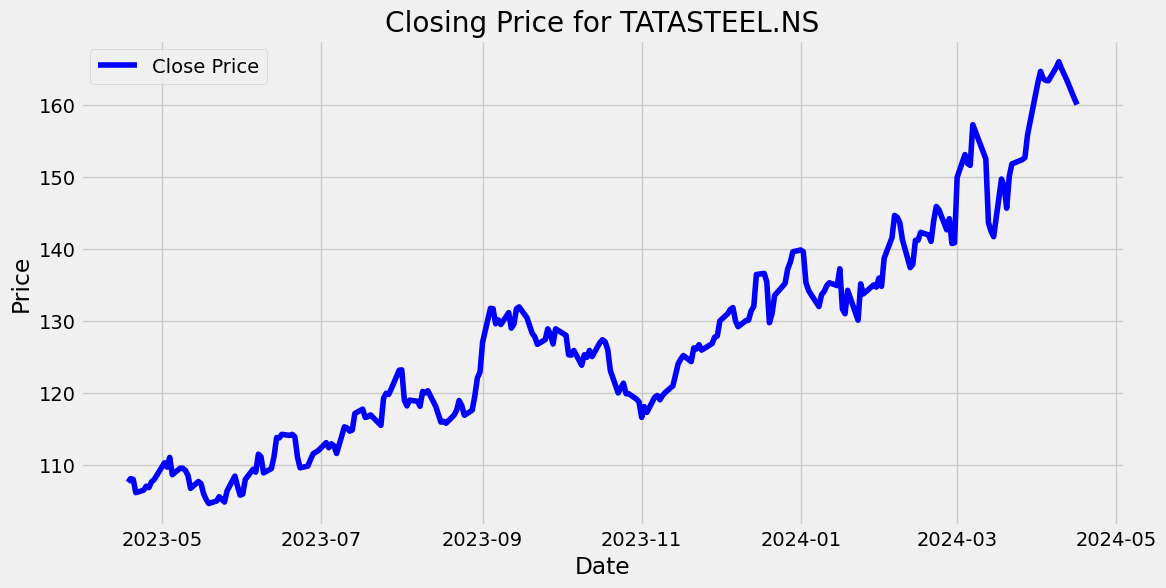

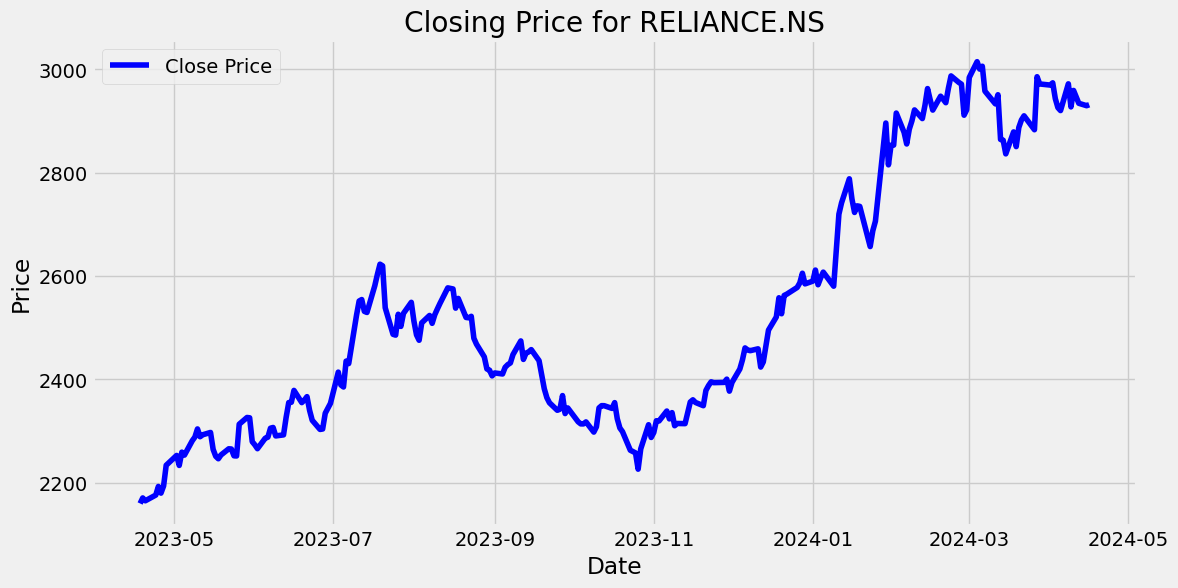

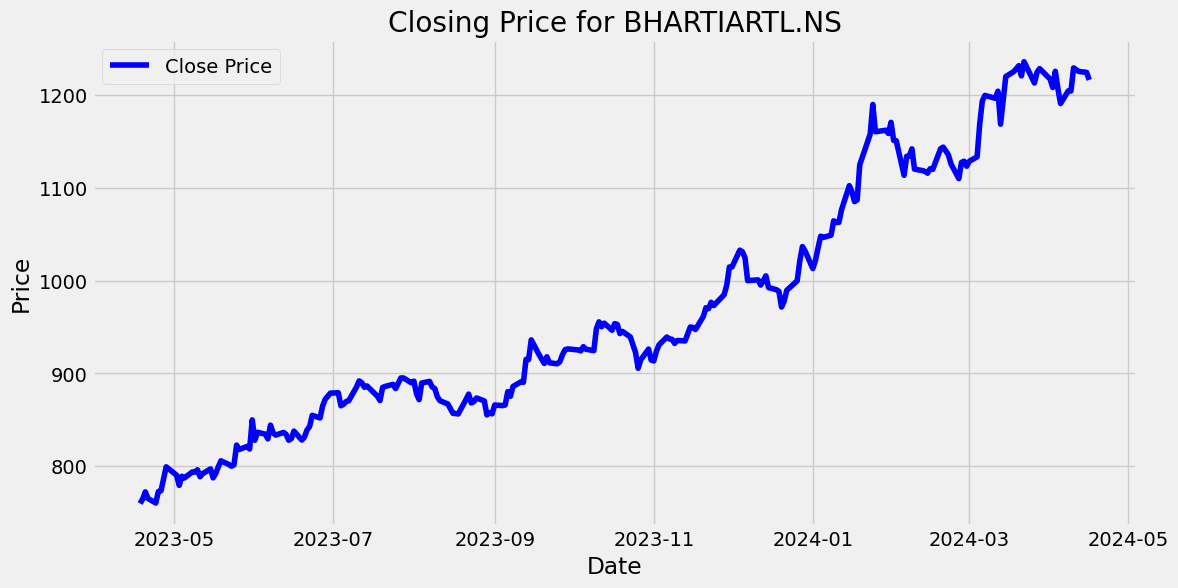

In [ ]:
# Calculate daily returns for each company
# Calculate daily returns for each company
for symbol, df in company_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.title(f'Closing Price for {symbol}')
    plt.grid(True)
    plt.show()

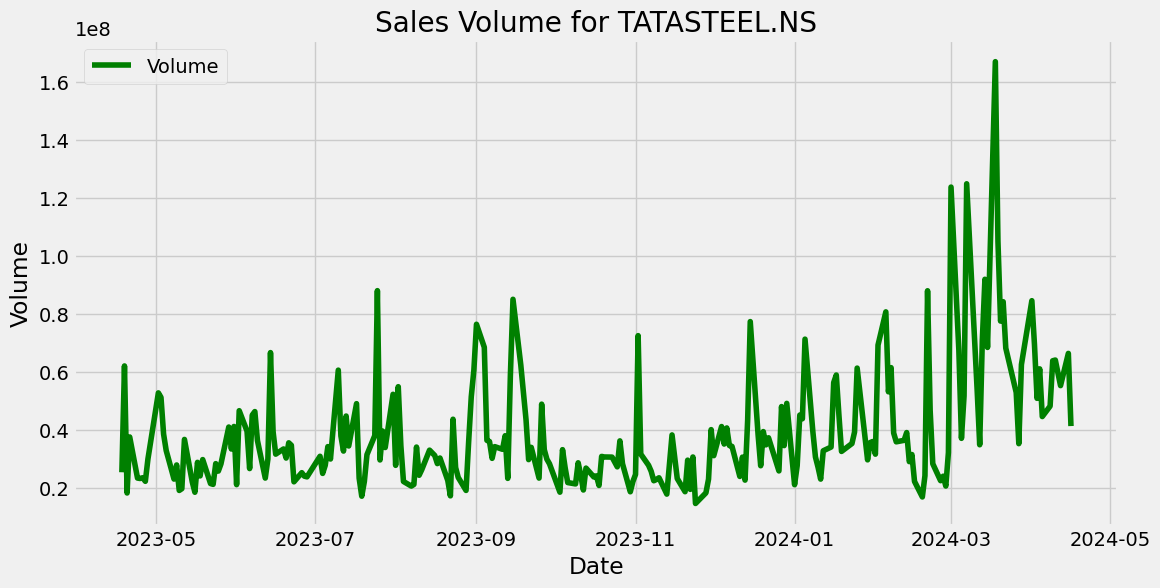

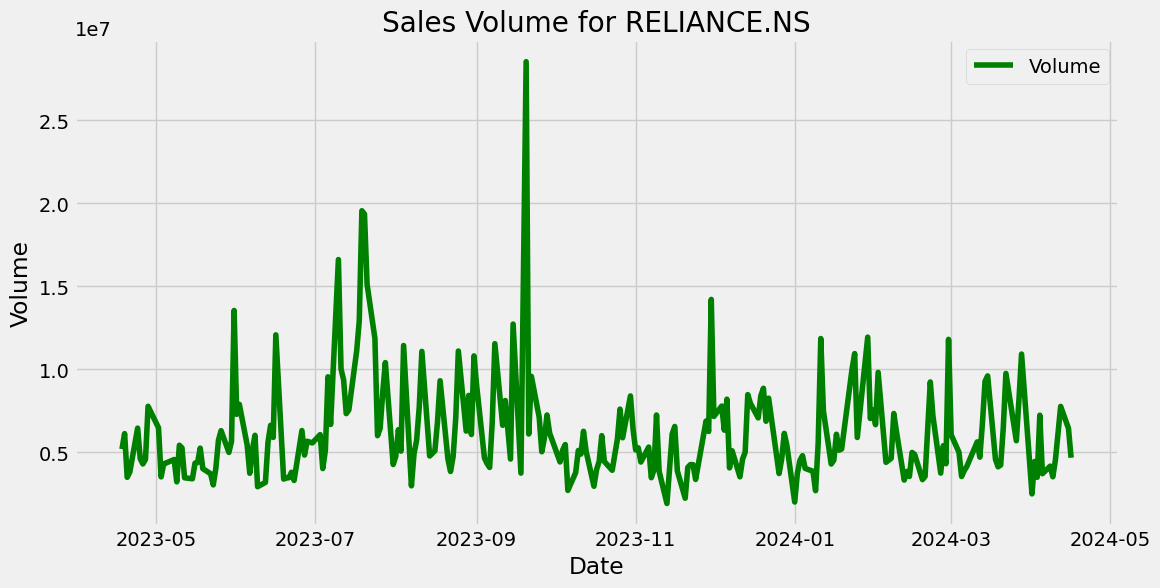

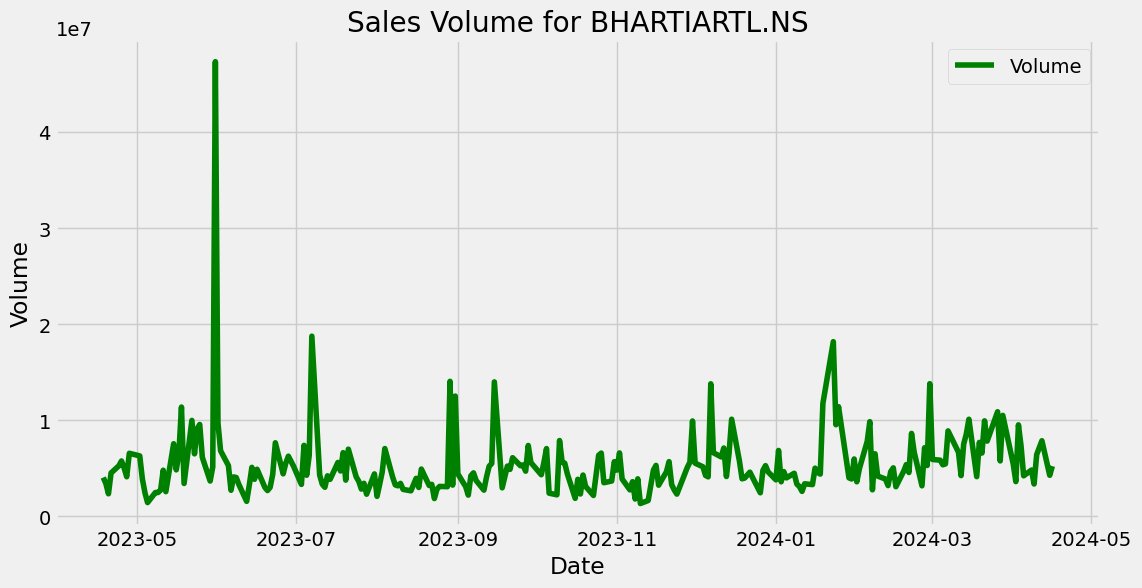

In [ ]:
for symbol, df in company_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Volume'], label='Volume', color='green')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.title(f'Sales Volume for {symbol}')
    plt.grid(True)
    plt.show()

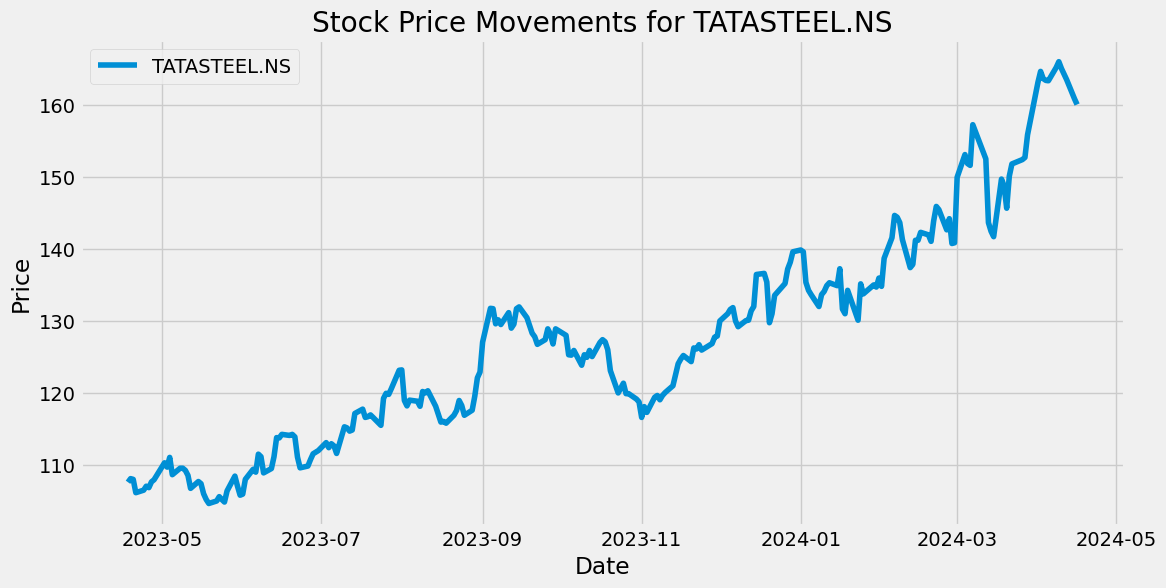

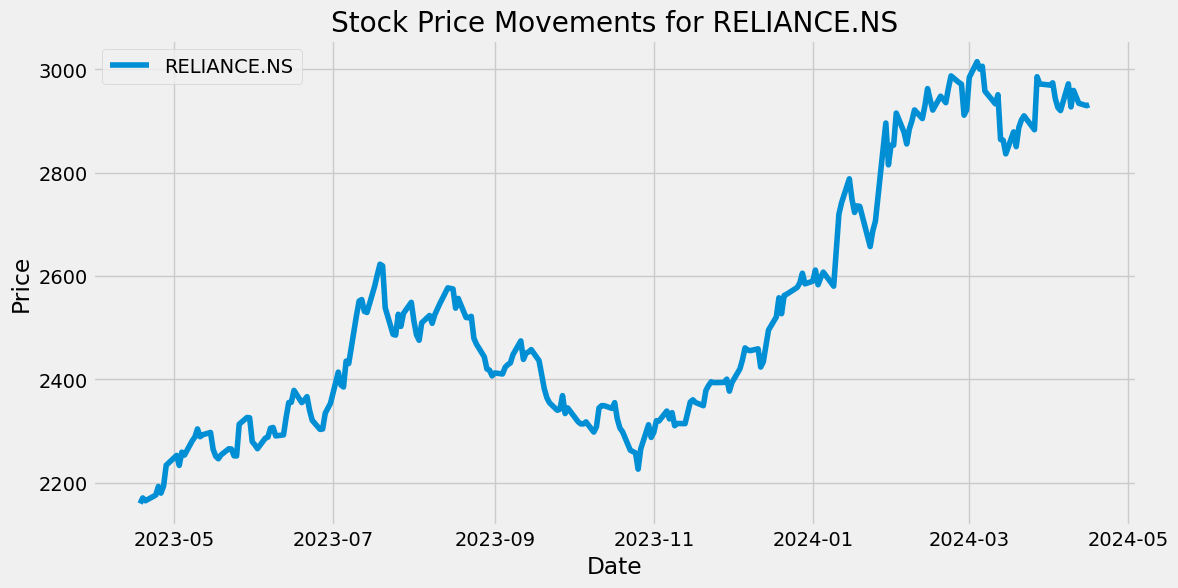

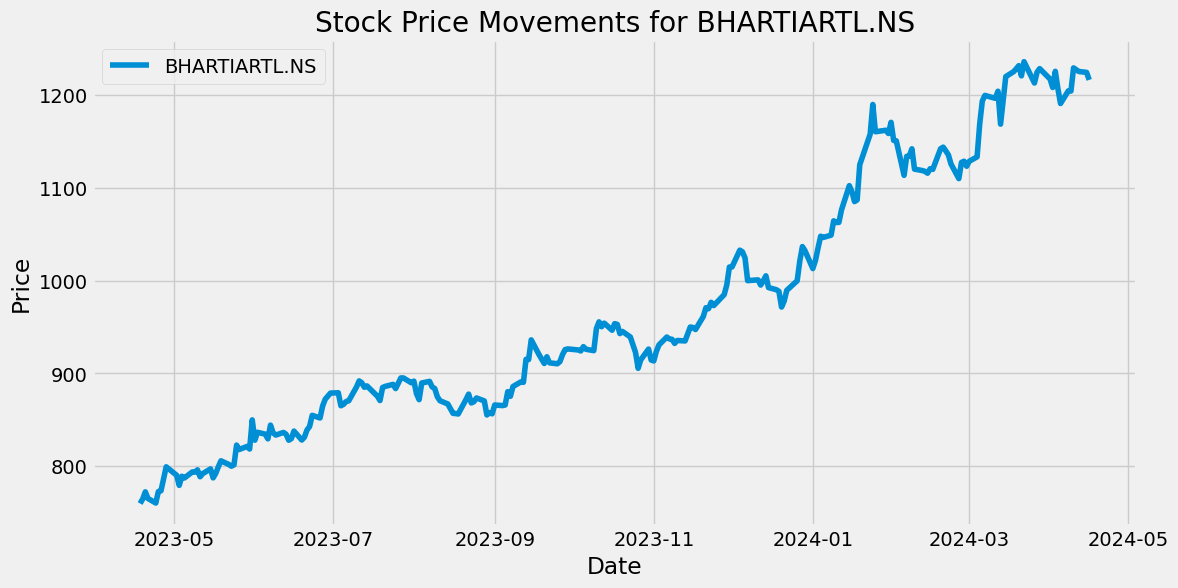

In [ ]:
for symbol, df in company_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label=symbol)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.title(f'Stock Price Movements for {symbol}')
    plt.grid(True)
    plt.show()

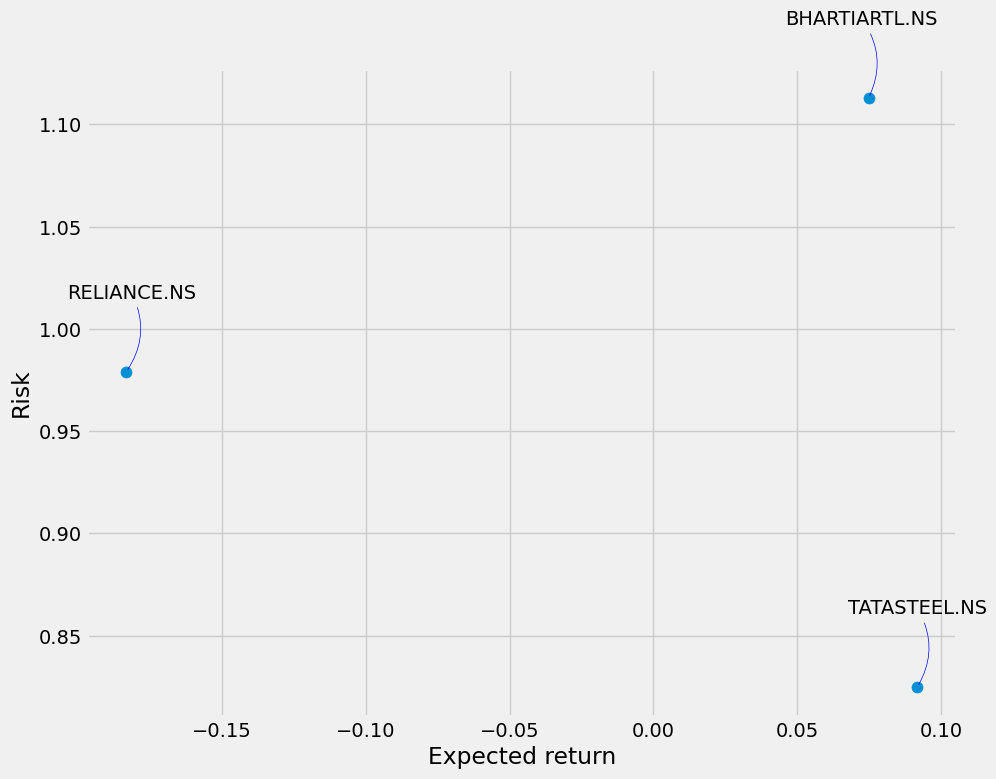

In [ ]:
# Generate random data as a placeholder for tech_rets
np.random.seed(42)
data = np.random.randn(100, 3)
tech_rets = pd.DataFrame(data, columns=['TATASTEEL.NS', 'RELIANCE.NS', 'BHARTIARTL.NS'])

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()

#LSTM

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Downloading stock data
company_symbols = ['TATASTEEL.NS', 'RELIANCE.NS', 'BHARTIARTL.NS']
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

company_data = {}

for symbol in company_symbols:
    df = yf.download(symbol, start=start_date, end=end_date)
    company_data[symbol] = df

# LSTM Model Training and Prediction
company_models = {}

for symbol, df in company_data.items():
    df = df[['Close']].copy()  # Considering only 'Close' prices
    dataset = df.values.astype('float32')
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # Splitting data into training and testing sets
    train_size = int(len(dataset) * 0.8)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

    # Function to create dataset with look back
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset) - look_back - 1):
            a = dataset[i:(i + look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # Reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    # LSTM Model
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

    company_models[symbol] = {'model': model, 'scaler': scaler}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Epoch 1/100
194/194 - 3s - loss: 0.0455 - 3s/epoch - 15ms/step
Epoch 2/100
194/194 - 1s - loss: 0.0173 - 635ms/epoch - 3ms/step
Epoch 3/100
194/194 - 1s - loss: 0.0142 - 551ms/epoch - 3ms/step
Epoch 4/100
194/194 - 0s - loss: 0.0114 - 402ms/epoch - 2ms/step
Epoch 5/100
194/194 - 0s - loss: 0.0084 - 340ms/epoch - 2ms/step
Epoch 6/100
194/194 - 0s - loss: 0.0057 - 341ms/epoch - 2ms/step
Epoch 7/100
194/194 - 0s - loss: 0.0035 - 398ms/epoch - 2ms/step
Epoch 8/100
194/194 - 0s - loss: 0.0020 - 351ms/epoch - 2ms/step
Epoch 9/100
194/194 - 0s - loss: 0.0012 - 349ms/epoch - 2ms/step
Epoch 10/100
194/194 - 0s - loss: 8.9352e-04 - 362ms/epoch - 2ms/step
Epoch 11/100
194/194 - 0s - loss: 7.9142e-04 - 341ms/epoch - 2ms/step
Epoch 12/100
194/194 - 0s - loss: 7.5889e-04 - 334ms/epoch - 2ms/step
Epoch 13/100
194/194 - 0s - loss: 7.5495e-04 - 347ms/epoch - 2ms/step
Epoch 14/100
194/194 - 0s - loss: 7.5438e-04 - 330ms/epoch - 2ms/step
Epoch 15/100
194/194 - 0s - loss: 7.5496e-04 - 335ms/epoch - 2ms/st

1/1 [==============================] - 1s 640ms/step
Predicted Price for TATASTEEL.NS on the next day: 154.5950164794922
Shape of actual_price: ()
Shape of predicted_price: (1, 1)
MAE for TATASTEEL.NS: 5.45
MSE for TATASTEEL.NS: 29.76
RMSE for TATASTEEL.NS: 5.45


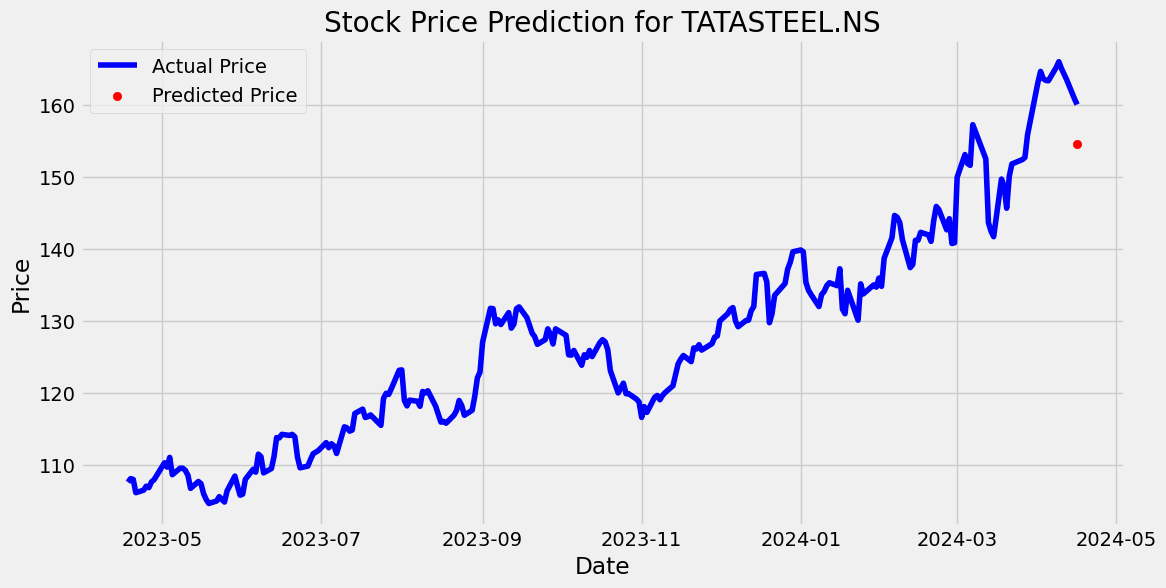

1/1 [==============================] - 1s 644ms/step
Predicted Price for RELIANCE.NS on the next day: 2901.6728515625
Shape of actual_price: ()
Shape of predicted_price: (1, 1)
MAE for RELIANCE.NS: 29.83
MSE for RELIANCE.NS: 889.66
RMSE for RELIANCE.NS: 29.83


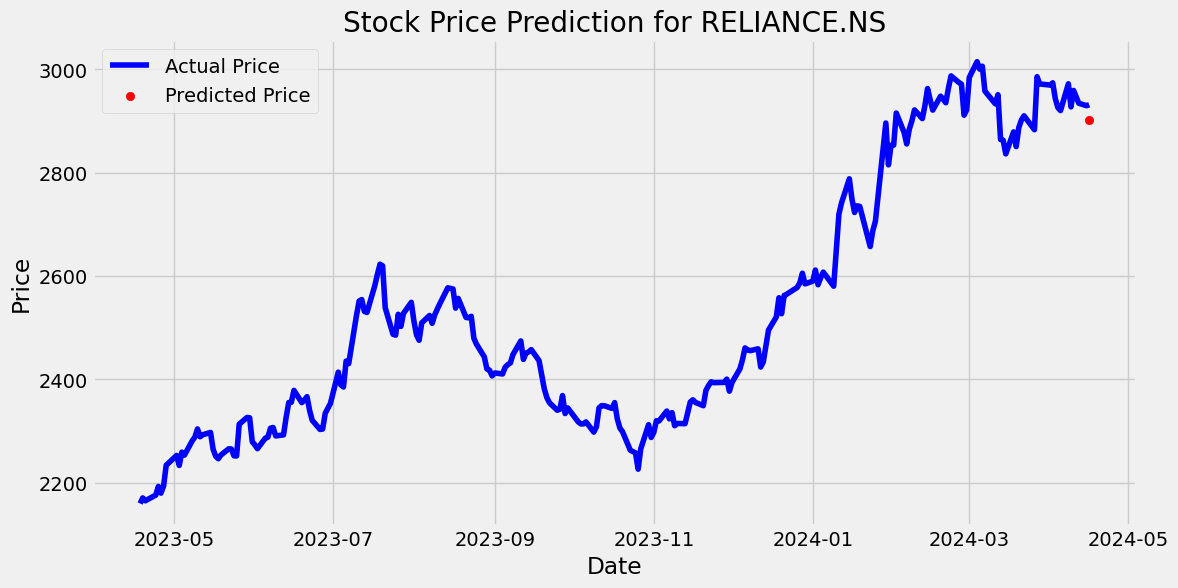

1/1 [==============================] - 0s 435ms/step
Predicted Price for BHARTIARTL.NS on the next day: 1219.9884033203125
Shape of actual_price: ()
Shape of predicted_price: (1, 1)
MAE for BHARTIARTL.NS: 3.54
MSE for BHARTIARTL.NS: 12.52
RMSE for BHARTIARTL.NS: 3.54


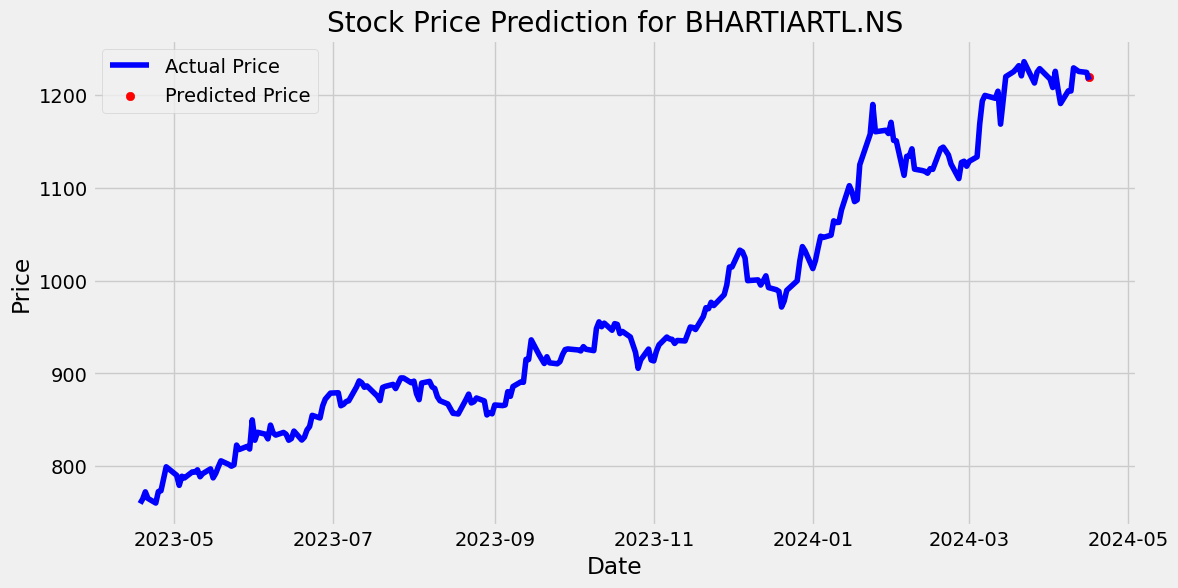

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions and Evaluation
for symbol, model_data in company_models.items():
    model = model_data['model']
    scaler = model_data['scaler']
    test_data = company_data[symbol][['Close']].tail(1).values.astype('float32')
    test_data = scaler.transform(test_data.reshape(-1, 1))

    # Reshape input to be [samples, time steps, features]
    test_data = np.reshape(test_data, (1, 1, 1))

    predicted_price = model.predict(test_data)
    predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))

    print(f"Predicted Price for {symbol} on the next day: {predicted_price[0][0]}")

    # Calculate errors
    actual_price = company_data[symbol]['Close'].iloc[-1]
    print(f"Shape of actual_price: {actual_price.shape}")
    print(f"Shape of predicted_price: {predicted_price.shape}")
    mae = mean_absolute_error([actual_price], predicted_price)
    mse = mean_squared_error([actual_price], predicted_price)
    rmse = np.sqrt(mse)

    print(f"MAE for {symbol}: {mae:.2f}")
    print(f"MSE for {symbol}: {mse:.2f}")
    print(f"RMSE for {symbol}: {rmse:.2f}")

    # Plotting stock prices
    plt.figure(figsize=(12, 6))
    plt.plot(company_data[symbol].index, company_data[symbol]['Close'], label='Actual Price', color='blue')
    plt.scatter(company_data[symbol].index[-1], predicted_price, label='Predicted Price', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Stock Price Prediction for {symbol}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import csv

# Define the file name
csv_file = 'prediction_results.csv'

# Predictions and Evaluation
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Symbol', 'Predicted Price', 'MAE', 'MSE', 'RMSE'])

    for symbol, model_data in company_models.items():
        model = model_data['model']
        scaler = model_data['scaler']
        test_data = company_data[symbol][['Close']].tail(1).values.astype('float32')
        test_data = scaler.transform(test_data.reshape(-1, 1))

        # Reshape input to be [samples, time steps, features]
        test_data = np.reshape(test_data, (1, 1, 1))

        predicted_price = model.predict(test_data)
        predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))

        # Calculate errors
        actual_price = company_data[symbol]['Close'].iloc[-1]
        print(f"Shape of actual_price: {actual_price.shape}")
        print(f"Shape of predicted_price: {predicted_price.shape}")
        mae = mean_absolute_error([actual_price], predicted_price)
        mse = mean_squared_error([actual_price], predicted_price)
        rmse = np.sqrt(mse)

        # Write results to CSV
        writer.writerow([symbol, predicted_price[0][0], mae, mse, rmse])

        # Print the results
        print(f"Predicted Price for {symbol} on the next day: {predicted_price[0][0]}")
        print(f"MAE for {symbol}: {mae:.2f}")
        print(f"MSE for {symbol}: {mse:.2f}")
        print(f"RMSE for {symbol}: {rmse:.2f}")

        # Plotting stock prices
        plt.figure(figsize=(12, 6))
        plt.plot(company_data[symbol].index, company_data[symbol]['Close'], label='Actual Price', color='blue')
        plt.scatter(company_data[symbol].index[-1], predicted_price, label='Predicted Price', color='red')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title(f'Stock Price Prediction for {symbol}')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'{symbol}_prediction_plot.png')
        plt.close()

# Notify user
print(f"Results saved to {csv_file}")


1/1 [==============================] - 0s 23ms/step
Shape of actual_price: ()
Shape of predicted_price: (1, 1)
Predicted Price for TATASTEEL.NS on the next day: 154.5950164794922
MAE for TATASTEEL.NS: 5.45
MSE for TATASTEEL.NS: 29.76
RMSE for TATASTEEL.NS: 5.45
1/1 [==============================] - 0s 29ms/step
Shape of actual_price: ()
Shape of predicted_price: (1, 1)
Predicted Price for RELIANCE.NS on the next day: 2901.6728515625
MAE for RELIANCE.NS: 29.83
MSE for RELIANCE.NS: 889.66
RMSE for RELIANCE.NS: 29.83
1/1 [==============================] - 0s 32ms/step
Shape of actual_price: ()
Shape of predicted_price: (1, 1)
Predicted Price for BHARTIARTL.NS on the next day: 1219.9884033203125
MAE for BHARTIARTL.NS: 3.54
MSE for BHARTIARTL.NS: 12.52
RMSE for BHARTIARTL.NS: 3.54
Results saved to prediction_results.csv


#ANN

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Downloading stock data
company_symbols = ['TATASTEEL.NS', 'RELIANCE.NS', 'BHARTIARTL.NS']
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

company_data = {}

for symbol in company_symbols:
    df = yf.download(symbol, start=start_date, end=end_date)
    company_data[symbol] = df

# LSTM Model Training and Prediction
company_models = {}

for symbol, df in company_data.items():
    df = df[['Close']].copy()  # Considering only 'Close' prices
    dataset = df.values.astype('float32')
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # Splitting data into training and testing sets
    train_size = int(len(dataset) * 0.8)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

    # Function to create dataset with look back
    def create_dataset(dataset, look_back=1):
        dataX, dataY = [], []
        for i in range(len(dataset) - look_back - 1):
            a = dataset[i:(i + look_back), 0]
            dataX.append(a)
            dataY.append(dataset[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)

    # Reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

    model_better = keras.Sequential([
    keras.layers.Dense(16, input_shape=(1,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='softmax')
])

# Compiling the model
    model_better.compile(optimizer='adam',
                     loss=keras.losses.SparseCategoricalCrossentropy(),
                     metrics=['accuracy'])

# fitting the model
    model_better.fit(trainX,trainY, epochs=10, batch_size=8)
    company_models[symbol] = {'model': model_better, 'scaler': scaler}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Epoch 1/10
25/25 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 10/10
25/25 [===========================

1/1 [==============================] - 0s 146ms/step
Predicted Price for TATASTEEL.NS on the next day: 166.0
Shape of actual_price: ()
Shape of predicted_price: (1, 1)
MAE for TATASTEEL.NS: 5.95
MSE for TATASTEEL.NS: 35.40
RMSE for TATASTEEL.NS: 5.95


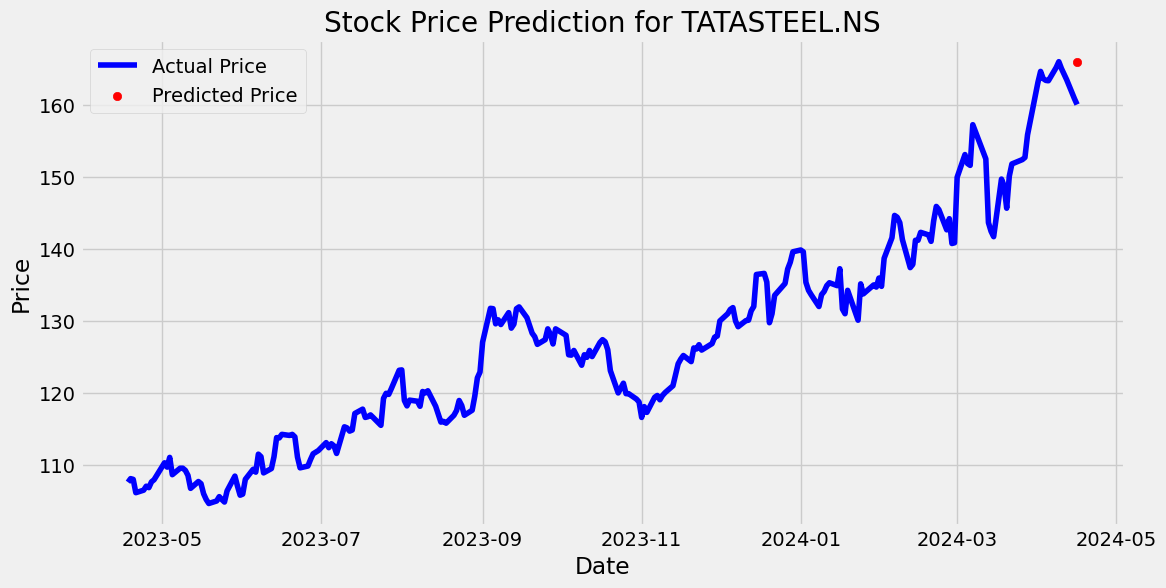

1/1 [==============================] - 0s 98ms/step
Predicted Price for RELIANCE.NS on the next day: 3014.800048828125
Shape of actual_price: ()
Shape of predicted_price: (1, 1)
MAE for RELIANCE.NS: 83.30
MSE for RELIANCE.NS: 6938.90
RMSE for RELIANCE.NS: 83.30


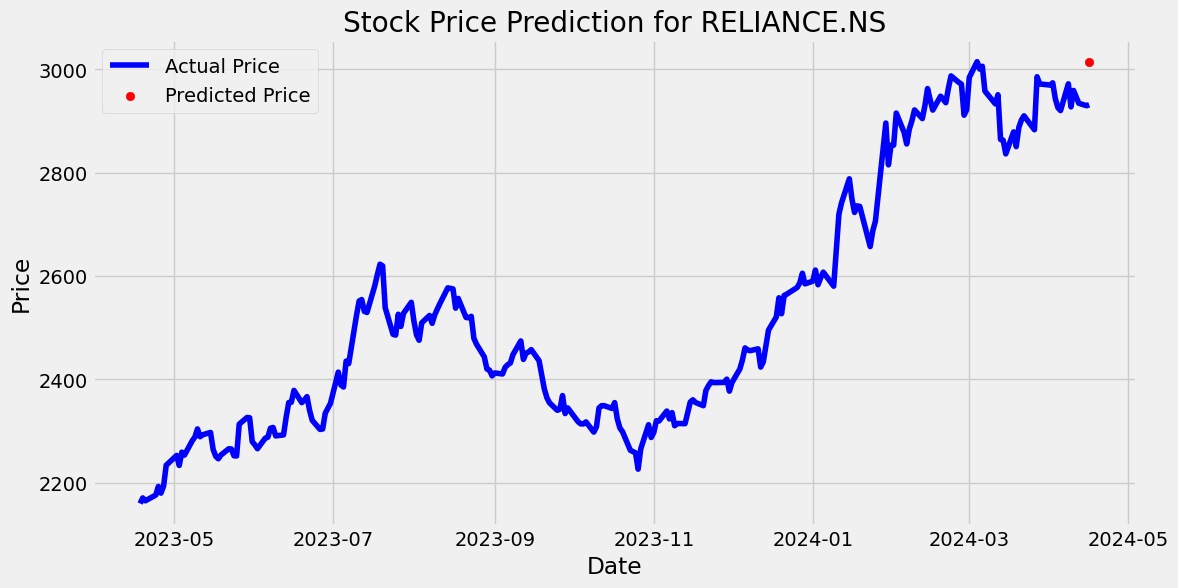

1/1 [==============================] - 0s 99ms/step
Predicted Price for BHARTIARTL.NS on the next day: 1236.0999755859375
Shape of actual_price: ()
Shape of predicted_price: (1, 1)
MAE for BHARTIARTL.NS: 19.65
MSE for BHARTIARTL.NS: 386.12
RMSE for BHARTIARTL.NS: 19.65


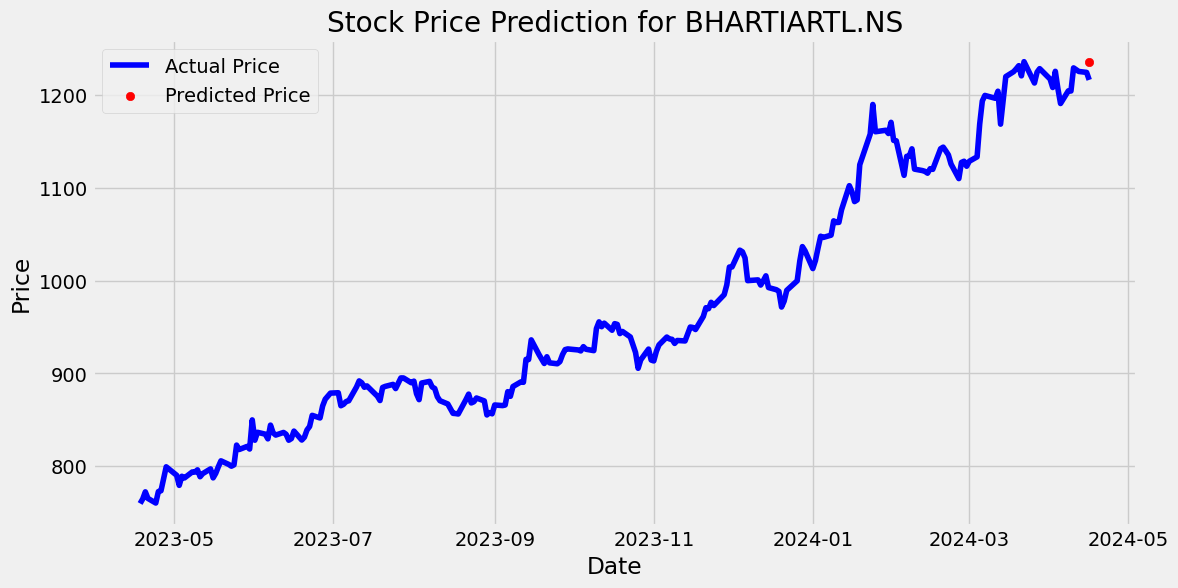

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions and Evaluation
for symbol, model_data in company_models.items():
    model = model_data['model']
    scaler = model_data['scaler']
    test_data = company_data[symbol][['Close']].tail(1).values.astype('float32')
    test_data = scaler.transform(test_data.reshape(-1, 1))

    # Reshape input to be [samples, time steps, features]
    test_data = np.reshape(test_data, (1, 1, 1))

    predicted_price = model.predict(test_data)
    predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))

    print(f"Predicted Price for {symbol} on the next day: {predicted_price[0][0]}")
    print(f"Shape of actual_price: {actual_price.shape}")
    print(f"Shape of predicted_price: {predicted_price.shape}")
    # Calculate errors
    actual_price = company_data[symbol]['Close'].iloc[-1]
    mae = mean_absolute_error([actual_price], predicted_price)
    mse = mean_squared_error([actual_price], predicted_price)
    rmse = np.sqrt(mse)

    print(f"MAE for {symbol}: {mae:.2f}")
    print(f"MSE for {symbol}: {mse:.2f}")
    print(f"RMSE for {symbol}: {rmse:.2f}")

    # Plotting stock prices
    plt.figure(figsize=(12, 6))
    plt.plot(company_data[symbol].index, company_data[symbol]['Close'], label='Actual Price', color='blue')
    plt.scatter(company_data[symbol].index[-1], predicted_price, label='Predicted Price', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Stock Price Prediction for {symbol}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import csv

# Define the file name
csv_file = 'prediction_results_ANN.csv'

# Predictions and Evaluation
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Symbol', 'Predicted Price', 'MAE', 'MSE', 'RMSE'])

    for symbol, model_data in company_models.items():
        model = model_data['model']
        scaler = model_data['scaler']
        test_data = company_data[symbol][['Close']].tail(1).values.astype('float32')
        test_data = scaler.transform(test_data.reshape(-1, 1))

        # Reshape input to be [samples, time steps, features]
        test_data = np.reshape(test_data, (1, 1, 1))

        predicted_price = model.predict(test_data)
        predicted_price = scaler.inverse_transform(predicted_price.reshape(-1, 1))

        # Calculate errors
        actual_price = company_data[symbol]['Close'].iloc[-1]
        print(f"Shape of actual_price: {actual_price.shape}")
        print(f"Shape of predicted_price: {predicted_price.shape}")
        mae = mean_absolute_error([actual_price], predicted_price)
        mse = mean_squared_error([actual_price], predicted_price)
        rmse = np.sqrt(mse)

        # Write results to CSV
        writer.writerow([symbol, predicted_price[0][0], mae, mse, rmse])

        # Print the results
        print(f"Predicted Price for {symbol} on the next day: {predicted_price[0][0]}")
        print(f"MAE for {symbol}: {mae:.2f}")
        print(f"MSE for {symbol}: {mse:.2f}")
        print(f"RMSE for {symbol}: {rmse:.2f}")

        # Plotting stock prices
        plt.figure(figsize=(12, 6))
        plt.plot(company_data[symbol].index, company_data[symbol]['Close'], label='Actual Price', color='blue')
        plt.scatter(company_data[symbol].index[-1], predicted_price, label='Predicted Price', color='red')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title(f'Stock Price Prediction for {symbol}')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'{symbol}_prediction_plot.png')
        plt.close()

# Notify user
print(f"Results saved to {csv_file}")


1/1 [==============================] - 0s 45ms/step
Shape of actual_price: ()
Shape of predicted_price: (1, 1)
Predicted Price for TATASTEEL.NS on the next day: 166.0
MAE for TATASTEEL.NS: 5.95
MSE for TATASTEEL.NS: 35.40
RMSE for TATASTEEL.NS: 5.95
1/1 [==============================] - 0s 94ms/step
Shape of actual_price: ()
Shape of predicted_price: (1, 1)
Predicted Price for RELIANCE.NS on the next day: 3014.800048828125
MAE for RELIANCE.NS: 83.30
MSE for RELIANCE.NS: 6938.90
RMSE for RELIANCE.NS: 83.30
1/1 [==============================] - 0s 29ms/step
Shape of actual_price: ()
Shape of predicted_price: (1, 1)
Predicted Price for BHARTIARTL.NS on the next day: 1236.0999755859375
MAE for BHARTIARTL.NS: 19.65
MSE for BHARTIARTL.NS: 386.12
RMSE for BHARTIARTL.NS: 19.65
Results saved to prediction_results_ANN.csv


In [ ]:
symbol

'BHARTIARTL.NS'

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
from matplotlib import pyplot


plt.style.use('fivethirtyeight')

# Downloading stock data
company_symbols = ['TATASTEEL.NS', 'RELIANCE.NS', 'BHARTIARTL.NS']
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

company_data = {}
predictions=[]
expected=[]
for symbol in company_symbols:
    df = yf.download(symbol, start=start_date, end=end_date)
    company_data[symbol] = df

# LSTM Model Training and Prediction
company_models = {}

for symbol, df in company_data.items():
    df = df[['Close']].copy()  # Considering only 'Close' prices
    dataset = df.values.astype('float32')
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # Splitting data into training and testing sets
    train_size = int(len(dataset) * 0.8)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
    history=[x for x in train]
    for t in range(0,len(test)):
      model = ARIMA(history, order=(5,1,0))
      model_fit = model.fit()
      output = model_fit.forecast()
      yhat = output[0]
      predictions.append(yhat)
      obs = test[t]
      expected.append(obs)
      history.append(obs)
      print('predicted=%f, expected=%f' % (yhat, obs))
    company_models[symbol] = {'model': model_better, 'scaler': scaler}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
<ipython-input-62-1cc9bc6d1962>:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=0.505265, expected=0.491443
predicted=0.492416, expected=0.555012
predicted=0.552171, expected=0.601467
predicted=0.602532, expected=0.651997
predicted=0.649801, expected=0.647922
predicted=0.646808, expected=0.635697
predicted=0.627545, expected=0.597392
predicted=0.591376, expected=0.533822
predicted=0.526430, expected=0.541157
predicted=0.544072, expected=0.595762
predicted=0.605651, expected=0.595762
predicted=0.600993, expected=0.613692
predicted=0.616394, expected=0.607987
predicted=0.604349, expected=0.593317
predicted=0.586346, expected=0.639772
predicted=0.640920, expected=0.672372
predicted=0.673202, expected=0.665037
predicted=0.662336, expected=0.619397
predicted=0.613994, expected=0.644662
predicted=0.642270, expected=0.588427
predicted=0.587218, expected=0.590057
predicted=0.591587, expected=0.738386
predicted=0.747154, expected=0.789731
predicted=0.785445, expected=0.769356
predicted=0.762046, expected=0.765281
predicted=0.752419, expected=0.857376
predicted=0.

<ipython-input-62-1cc9bc6d1962>:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=0.821653, expected=0.883696
predicted=0.874630, expected=0.839994
predicted=0.851026, expected=0.813727
predicted=0.799632, expected=0.847307
predicted=0.855564, expected=0.865970
predicted=0.867910, expected=0.890833
predicted=0.886247, expected=0.871176
predicted=0.872141, expected=0.901013
predicted=0.897718, expected=0.939098
predicted=0.945325, expected=0.913883
predicted=0.911093, expected=0.890424
predicted=0.886204, expected=0.921840
predicted=0.926240, expected=0.914878
predicted=0.917261, expected=0.907097
predicted=0.901708, expected=0.939976
predicted=0.942668, expected=0.967765
predicted=0.969195, expected=0.953022
predicted=0.950145, expected=0.949102
predicted=0.947761, expected=0.878840
predicted=0.881625, expected=0.890950
predicted=0.886739, expected=0.964255
predicted=0.973065, expected=1.000000
predicted=0.996736, expected=0.983151
predicted=0.975766, expected=0.989703
predicted=0.989230, expected=0.933365
predicted=0.936194, expected=0.904523
predicted=0.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.959362, expected=0.947055
predicted=0.929948, expected=0.952144
predicted=0.962848, expected=0.916224
predicted=0.912026, expected=0.895923
predicted=0.895000, expected=0.889312
predicted=0.892699, expected=0.949863
predicted=0.948370, expected=0.897620
predicted=0.903342, expected=0.934886
predicted=0.925107, expected=0.905810
predicted=0.918033, expected=0.900369
predicted=0.889768, expected=0.902534


<ipython-input-62-1cc9bc6d1962>:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=0.866028, expected=0.821770


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.817050, expected=0.820930
predicted=0.818698, expected=0.742731
predicted=0.744171, expected=0.785767
predicted=0.781926, expected=0.786292
predicted=0.795881, expected=0.802771
predicted=0.789389, expected=0.756796
predicted=0.758597, expected=0.753542
predicted=0.751726, expected=0.751758
predicted=0.760362, expected=0.747559
predicted=0.742566, expected=0.757741
predicted=0.755885, expected=0.756272
predicted=0.756699, expected=0.802876
predicted=0.802284, expected=0.806550
predicted=0.809613, expected=0.798048
predicted=0.791621, expected=0.788916
predicted=0.793400, expected=0.768343
predicted=0.770883, expected=0.735384
predicted=0.733852, expected=0.772016
predicted=0.774107, expected=0.774640
predicted=0.777747, expected=0.763304
predicted=0.753914, expected=0.774535
predicted=0.777234, expected=0.784612
predicted=0.787731, expected=0.858927
predicted=0.859129, expected=0.910990
predicted=0.915938, expected=0.923586
predicted=0.917951, expected=0.917078
predicted=0.

In [ ]:
p1=predictions[0:50]
p2=predictions[51:100]
p3=predictions[101:150]

In [ ]:
ex1=expected[0:50]
ex2=expected[51:100]
ex3=expected[101:150]

In [ ]:
rmse1 = sqrt(mean_squared_error(ex1, p1))
rmse2 = sqrt(mean_squared_error(ex2, p2))
rmse3 = sqrt(mean_squared_error(ex3, p3))
print('Test RMSE: %.3f' % rmse1)
print('Test RMSE: %.3f' % rmse2)
print('Test RMSE: %.3f' % rmse3)
'''# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()'''

Test RMSE: 0.052
Test RMSE: 0.039
Test RMSE: 0.033


"# plot forecasts against actual outcomes\npyplot.plot(test)\npyplot.plot(predictions, color='red')\npyplot.show()"